## K-Means를 이용한 붓꽃(Iris) 데이터 셋 Clustering

In [34]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()

# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data = iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


<h4> KMeans 객체를 생성하고 군집화 수행

In [35]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter = 300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

<h4> labels_ 속성을 통해 각 데이터 포인트별로 할당된 군집 중심점(Centroid)확인하고 irisDF에 'cluster' 컬럼으로 추가

In [77]:
print(kmeans.predict(irisDF))
print(kmeans.labels_)

C:\Users\sapb2\anaconda3\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- cluster
- pca_x
- pca_y
- target
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 8 features, but KMeans is expecting 4 features as input.

In [78]:
irisDF['cluster'] = kmeans.labels_

In [79]:
irisDF['target'] = iris.target
print(iris.target_names)
# target 0: setosa 1 : versicolor 2 : virginica

# cluster 의 0 ,1 , 2 숫자들은 임의로 매핑 한것.
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

['setosa' 'versicolor' 'virginica']
target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [80]:
iris_feature = irisDF.drop(['target','cluster'],axis=1, inplace=False)
print(iris_feature.shape)
print(irisDF['target'].shape)
iris_feature.head(3)

(150, 6)
(150,)


,sepal_length,sepal_width,petal_length,petal_width,pca_x,pca_y
0,5.1,3.5,1.4,0.2,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,-2.888991,-0.144949


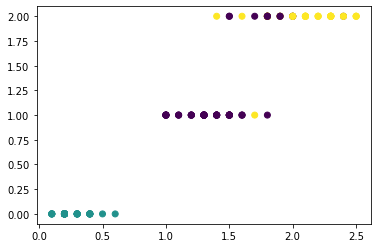

In [81]:
plt.scatter(x=iris_feature['petal_width'], y=irisDF['target'], c=irisDF['cluster'])

<h4> 2차원 평면에 데이터 포인트별로 군집화된 결과를 나타내기 위해 2차원 PCA값으로 각 데이터 차원축소

In [82]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949


In [83]:
print(irisDF.loc[:,'pca_x'].shape)

(150,)


In [84]:
print(irisDF.loc[:,'pca_y'].shape)

(150,)


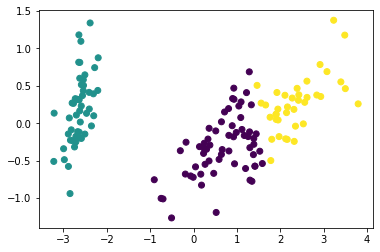

In [85]:
plt.scatter(x=irisDF.loc[:,'pca_x'], y=irisDF.loc[:,'pca_y'], c=irisDF['cluster'])

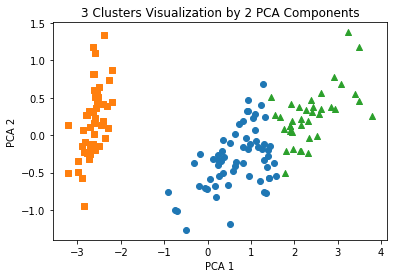

In [86]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'],y=irisDF.loc[marker0_ind,'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

## Clustering 알고리즘 테스트를 위한 데이터 생성

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

# make_blobs -> 다양한 datasets 제공

x,y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.8, random_state = 0)
print(x.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts = True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [88]:
pd.DataFrame(data= x).head(3)

,0,1
0,-1.692427,3.622025
1,0.697940,4.428867
2,1.100228,4.606317


In [89]:
pd.DataFrame(data= y).head(3)

,0
0,2
1,0
2,0


<li>n_samples: 생성할 총 데이터의 개수입니다. 디폴트는 100개입니다. </li><br>
<li>n_features: 데이터의 피처 개수입니다. 
    <br>시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 두 번째 피처 는 y 좌표상에 표현합니다. </li><br>
<li>centers: int 값, 예를 들어 3으로 설정하면 군집의 개수를 나타냅니다. <br>그렇지 않고 ndarray 형태로 표현할 경우 개별 군 집 중심점의 좌표를 의미합니다.
 </li><br>
<li>cluster_std: 생성될 군집 데이터의 표준 편차를 의미합니다. 
    <br>만일 float 값 0.8과 같은 형태로 지정하면 군집 내에서 데이터가 표준편차 0.8을 가진 값으로 만들어집니다.
<br>[0.8, 1.2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째 군집 내 데이터의 표준편차는 0.8, 두 번째 군집 내 데이터의 표준 편차는 1.2, 세 번째 군집 내 데이터의 표준편차는 0.6으로 만듭 니다.
군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용합니다

In [90]:
import pandas as pd

clusterDF = pd.DataFrame(data = x, columns =['ftr1','ftr2'] )
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


In [95]:
target_list = np.unique(y)
for target in target_list :
    target_cluster = clusterDF[clusterDF['target']==target]
    print(target_cluster.head(3))

       ftr1      ftr2  target
1  0.697940  4.428867       0
2  1.100228  4.606317       0
4  1.214861  5.364896       0
        ftr1      ftr2  target
6   2.472119  0.437033       1
7   1.656842  2.441289       1
16  2.684330  0.524528       1
       ftr1      ftr2  target
0 -1.692427  3.622025       2
3 -1.448724  3.384245       2
5 -0.908302  1.970778       2


<h4> make_blob()으로 만들어진 데이터 포인트들을 시각화

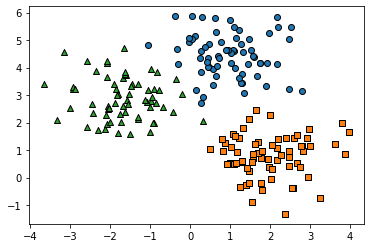

In [91]:
target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 

for target in target_list :
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',marker = markers[target])
    
plt.show()

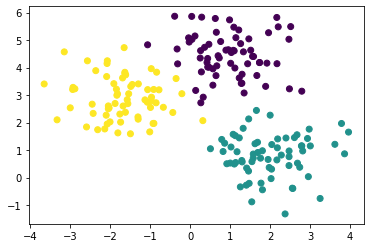

In [98]:
# 간단히
plt.scatter(x=clusterDF['ftr1'], y=clusterDF['ftr2'],c=y)

<h4> K-Means 클러스터링을 수행하고 개별 클러스터의 중심 위치를 시각화

In [104]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters = 3, init="k-means++", max_iter = 200, random_state = 0)
cluster_labels = kmeans.fit_predict(x)
clusterDF['kmeans_label'] = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

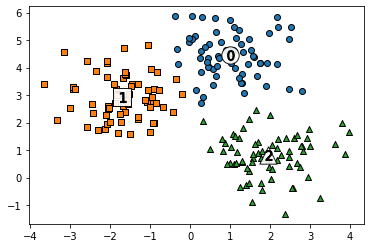

In [113]:
# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
               marker = markers[label])
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=300, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    # 숫자 매김 marker = "$%d$" % label --> 각 label의 숫자
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=100, color='k', edgecolor='k', 
                marker='$%d$' % label) 

In [114]:
kmeans.cluster_centers_

array([[ 0.990103  ,  4.44666506],
       [-1.70636483,  2.92759224],
       [ 1.95763312,  0.81041752]])

In [115]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64
